In [29]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import mdtraj
import pytraj as pt
from simtk import openmm, unit


In [30]:

#BGangles = np.loadtxt("HNCanglesBG.dat", usecols=1)
#MDangles = np.loadtxt("HNCanglesMD.dat", usecols=1)

def plot_dof_comparison(BGdof, MDdof, MD2dof, dofname):  
    fig, ax = plt.subplots()    

    if 'bond' in dofname:
        ax.set_xlabel(f"{dofname} ($\AA$)")
    if 'angle' in dofname:
        ax.set_xlabel(f"{dofname} ($^\circ$)")
    if 'dihed'in dofname:
        ax.set_xlabel(f"{dofname} ($^\circ$)")
    # y-axis on the right
    
    ax.hist(BGdof, bins=40, label="BG", alpha=1)
    ax.hist(MDdof, bins=40, label="MD", alpha=0.7)
    ax.hist(MD2dof, bins=40, label="MD2", alpha=0.5)
    ax.set_ylabel(f"Count   [#{dofname} / {len(MDdof)}]")
    ax.legend()
    #plt.savefig(f"Histograms/{dofname}.png")
    plt.close

In [31]:
#plot_dof_comparison(BGangles,MDangles,"HNC angle")

In [51]:
trajectory_bg = pt.load('samplestraj2000mixed.pdb', top='ala.prm7')
trajectory_md = pt.load('TSFtraj.dcd',top='ala.prm7',stride=100)
trajectory_md2 = pt.load('obcimplicit.dcd', top='ala.prm7', stride=28)

In [56]:
def calc_bonds(trajectory,type):
    bonds = {}
    for bond in trajectory.topology.bonds:
        bonds[str(bond.indices)] = pt.calc_distance(trajectory, bond.indices)[0]
    df = pd.DataFrame(bonds)
    df.to_csv(f'{type}bonds.csv')
    return df
    

headers = []
atompairs = np.empty((trajectory_md2.topology.n_bonds,2))
i = 0
for bond in trajectory_md2.topology.bonds:
    headers.append(str(bond))
    atompairs[i,:] = [bond.atom1.index,bond.atom2.index]
    i += 1
#print(atompairs[0:2,:])
MD2bonds = mdtraj.compute_distances(trajectory_md2,atompairs)
#print(MDbonds)

MD2bondsdf = pd.DataFrame(MD2bonds, columns=[headers])

for col in MD2bondsdf.columns:
    fig, ax = plt.subplots()   
    
    ax.set_xlabel(f"length ($\AA$)")
    ax.hist((MD2bondsdf[col]*10), bins=40, label="MD",)
    ax.set_ylabel(f"Count   [#bonds / {len(MD2bondsdf[col])}]")
    ax.legend()
    #plt.savefig(f"Histograms/{dofname}.png" )
    plt.close

plt.close('all')

In [57]:
BGbonds = calc_bonds(trajectory_bg, type='BG')
MDbonds = calc_bonds(trajectory_md, type='MD')
MD2bonds = calc_bonds(trajectory_md2, type = 'MD2')
print(BGbonds.columns)
print(MDbonds.columns)
print(MD2bonds.columns)

Index(['[4 5]', '[4 6]', '[1 4]', '[14 15]', '[14 16]', '[ 8 10]', '[ 8 14]',
       '[6 8]', '[16 18]', '[1 2]', '[1 3]', '[0 1]', '[10 11]', '[10 12]',
       '[10 13]', '[8 9]', '[6 7]', '[18 19]', '[18 20]', '[18 21]',
       '[16 17]'],
      dtype='object')
Index(['[4 5]', '[4 6]', '[1 4]', '[14 15]', '[14 16]', '[ 8 10]', '[ 8 14]',
       '[6 8]', '[16 18]', '[1 2]', '[1 3]', '[0 1]', '[10 11]', '[10 12]',
       '[10 13]', '[8 9]', '[6 7]', '[18 19]', '[18 20]', '[18 21]',
       '[16 17]'],
      dtype='object')
Index(['[4 5]', '[4 6]', '[1 4]', '[14 15]', '[14 16]', '[ 8 10]', '[ 8 14]',
       '[6 8]', '[16 18]', '[1 2]', '[1 3]', '[0 1]', '[10 11]', '[10 12]',
       '[10 13]', '[8 9]', '[6 7]', '[18 19]', '[18 20]', '[18 21]',
       '[16 17]'],
      dtype='object')


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


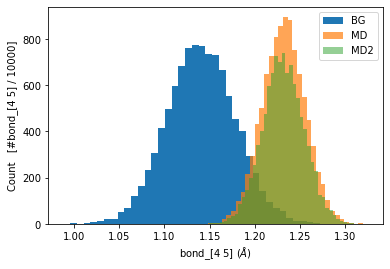

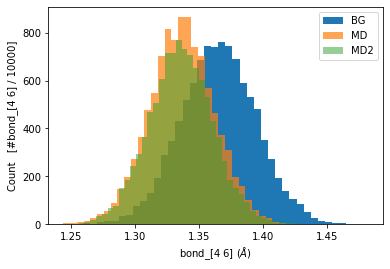

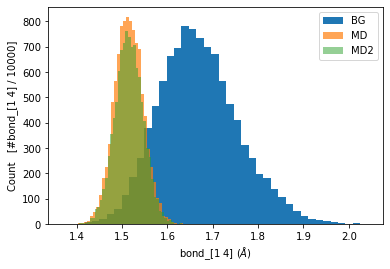

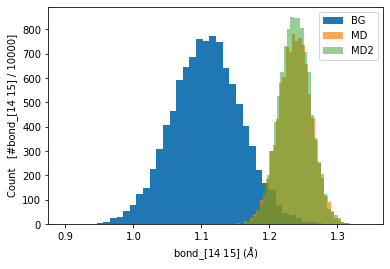

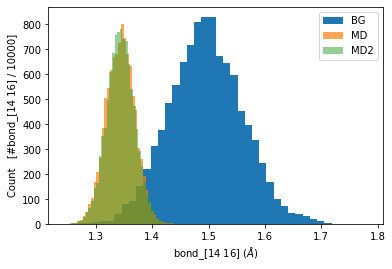

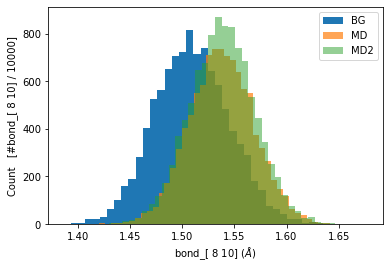

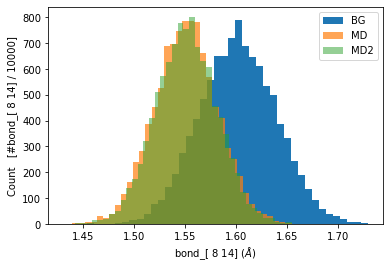

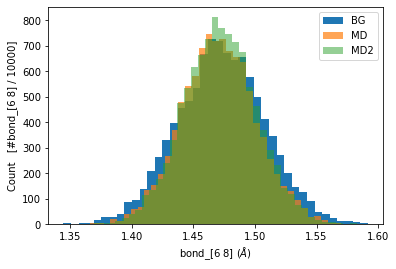

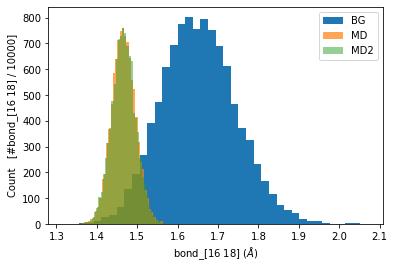

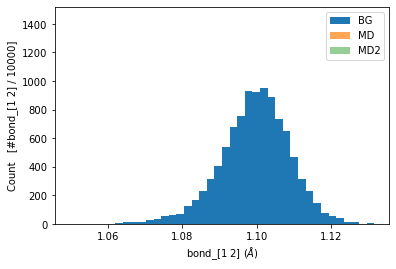

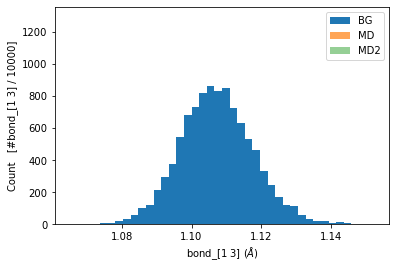

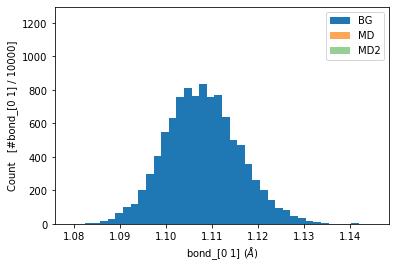

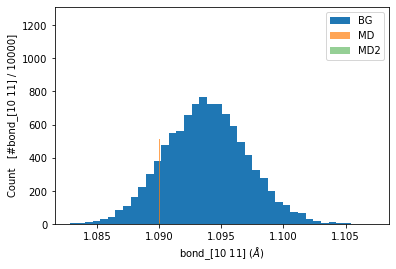

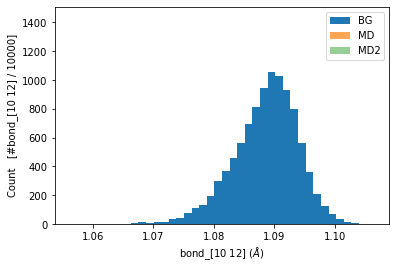

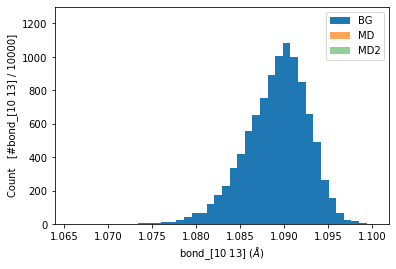

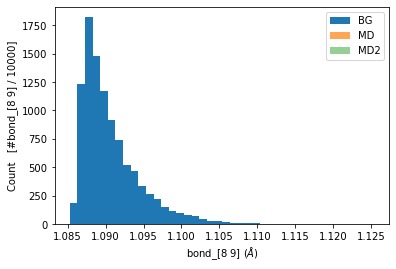

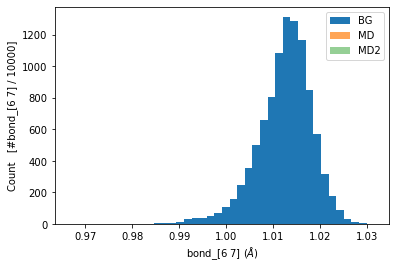

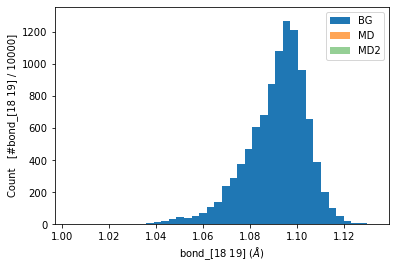

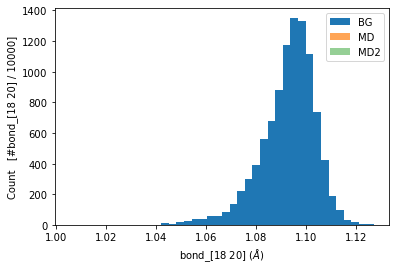

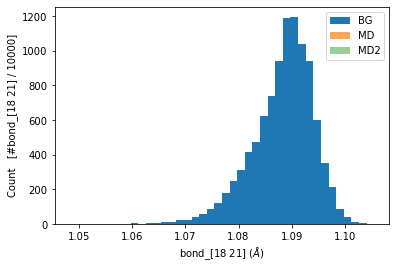

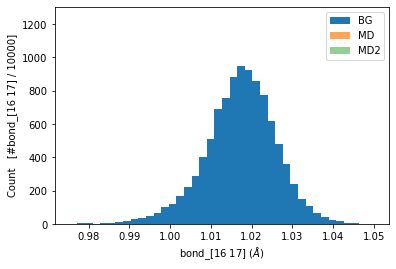

In [58]:
#print(BGbonds.columns)
for col in BGbonds.columns:
    plot_dof_comparison(BGbonds[col],MDbonds[col],MD2bonds[col] ,dofname=f'bond_{col}')

In [36]:
#test = pt.load('samplestraj2000mixed.pdb', top='ala.prm7')

RuntimeError: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)

In [61]:
def calc_diheds(trajectory,type):
    diheds = {}
    for dihedral in trajectory.topology.dihedrals:
        diheds[str(dihedral.indices)] = pt.calc_dihedral(trajectory, dihedral.indices)[0]

    df = pd.DataFrame(diheds)
    df.to_csv(f'{type}diheds.csv')
    return df


In [60]:
BGdiheds = calc_diheds(trajectory_bg,'BG')
MDdiheds = calc_diheds(trajectory_md,'MD')
MD2diheds = calc_diheds(trajectory_md2,'MD2')


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


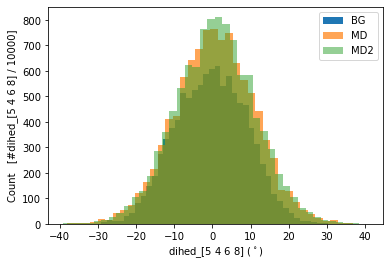

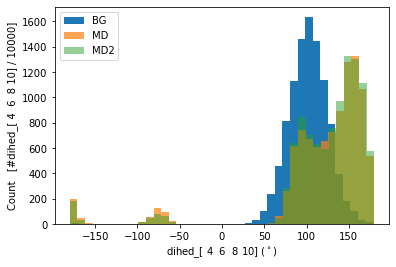

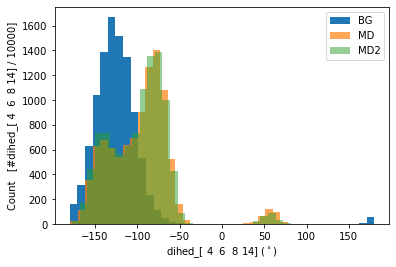

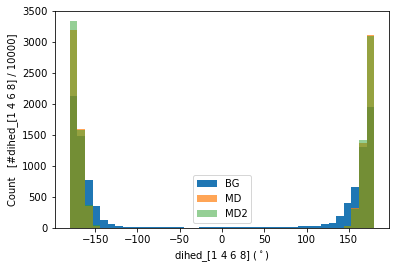

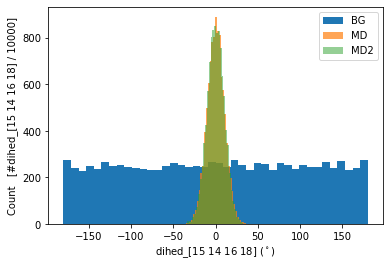

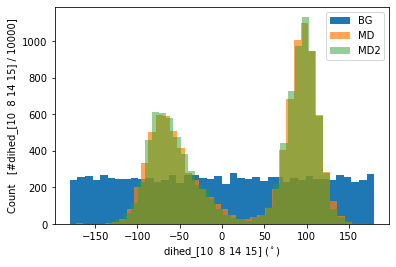

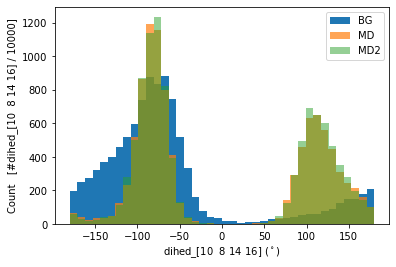

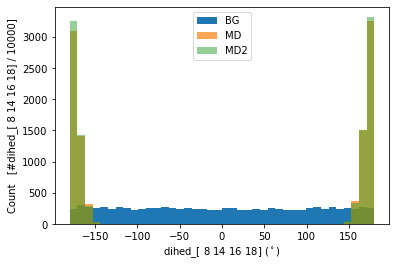

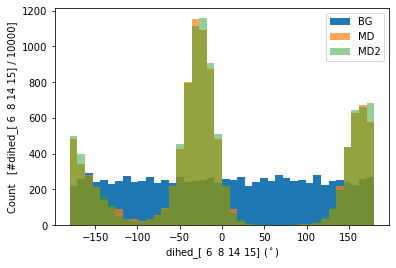

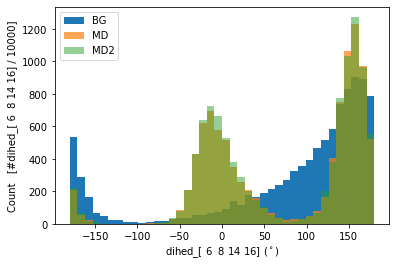

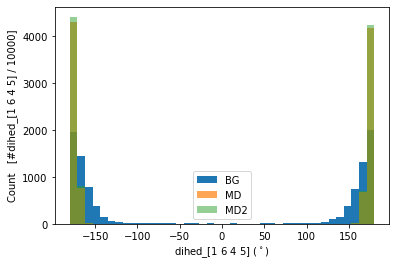

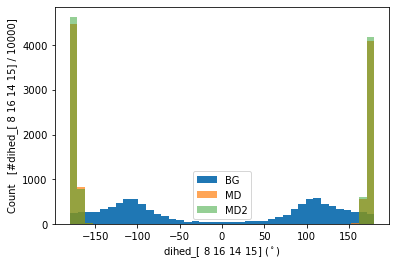

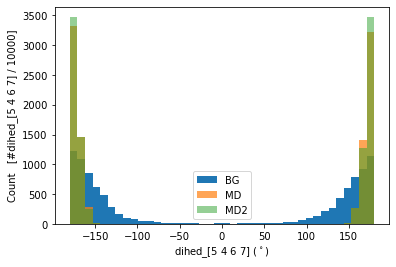

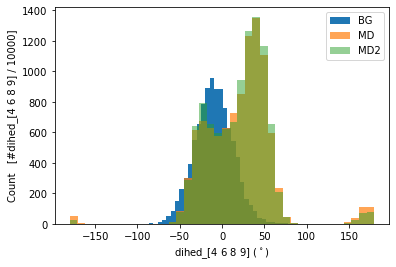

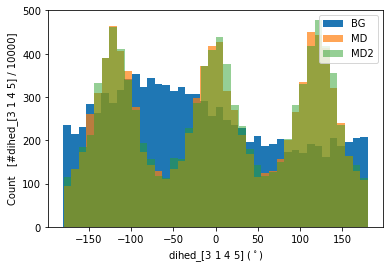

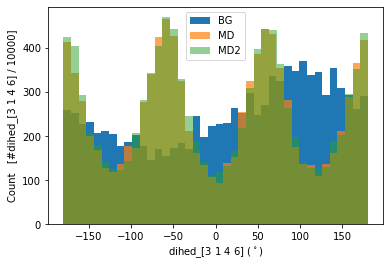

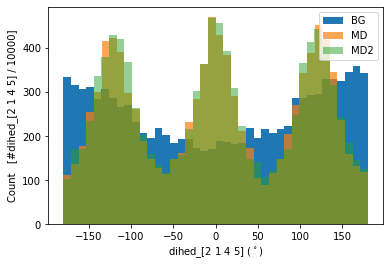

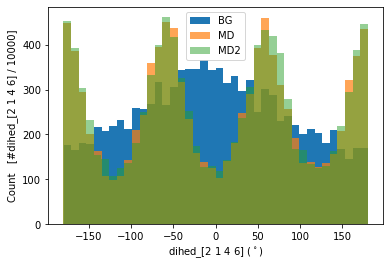

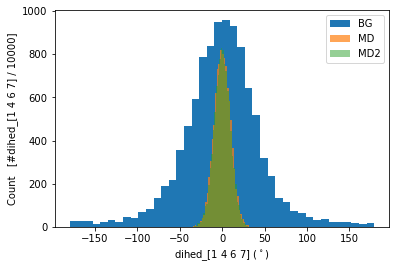

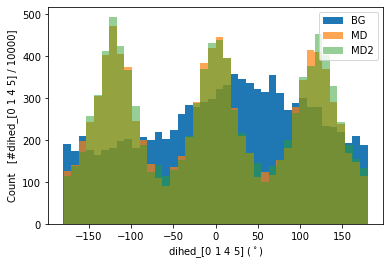

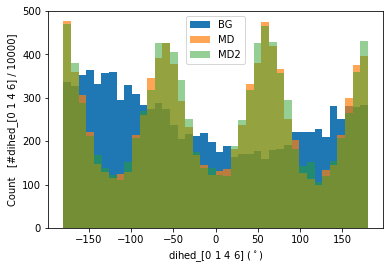

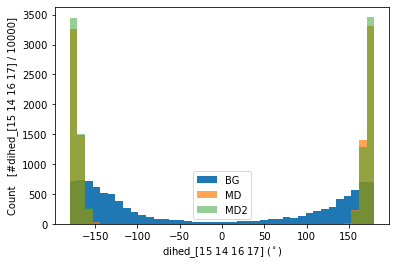

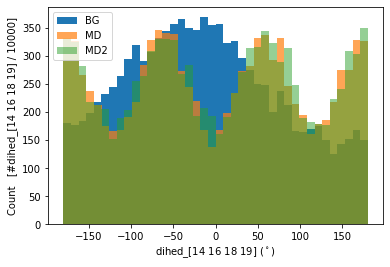

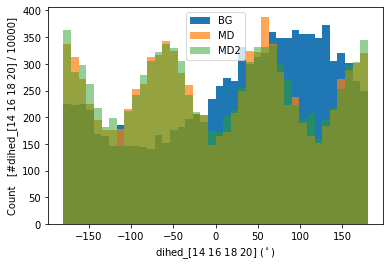

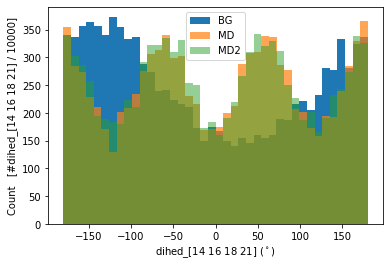

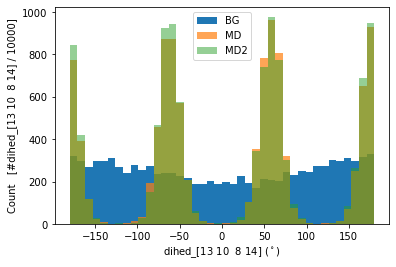

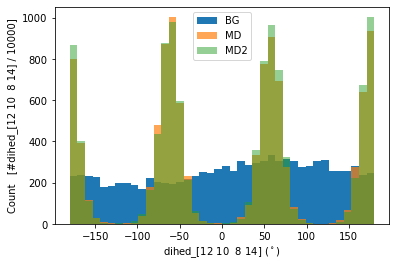

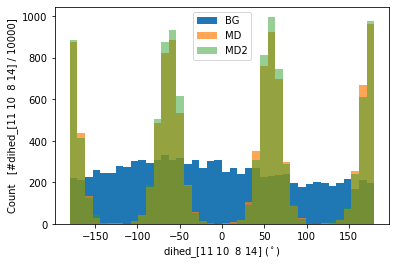

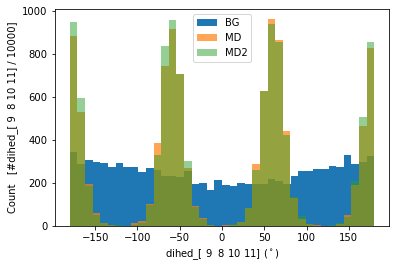

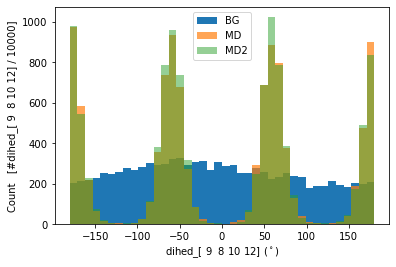

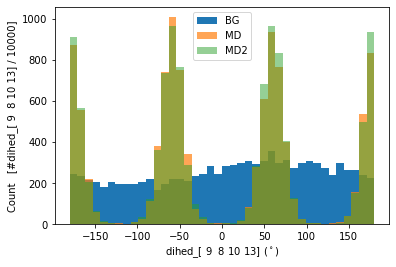

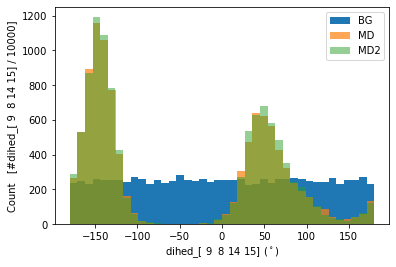

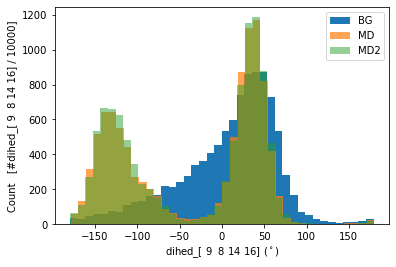

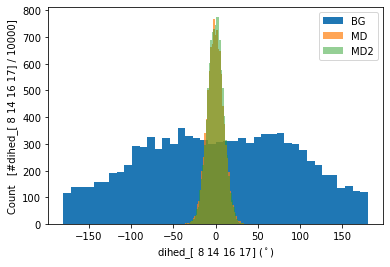

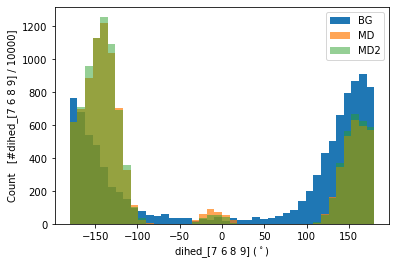

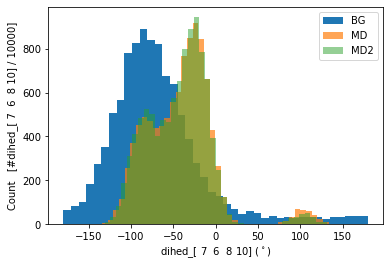

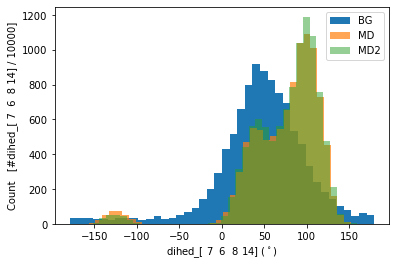

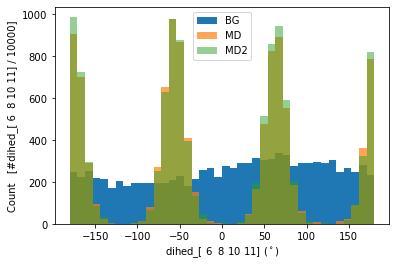

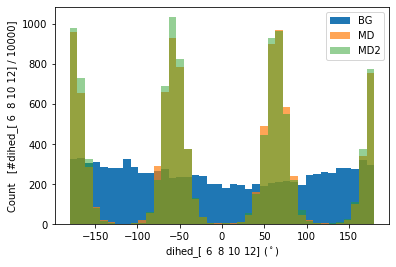

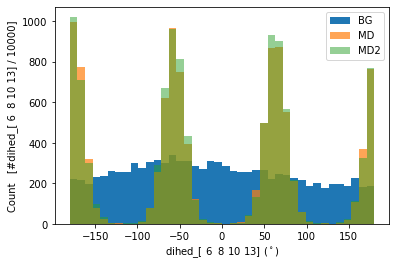

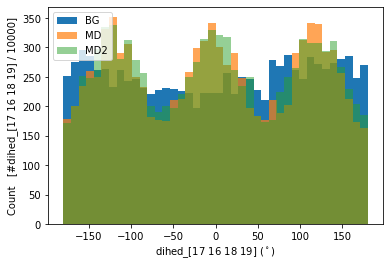

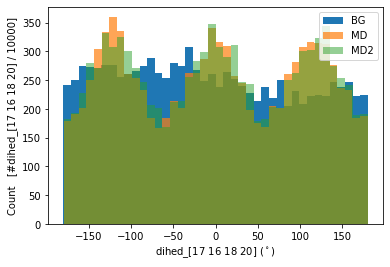

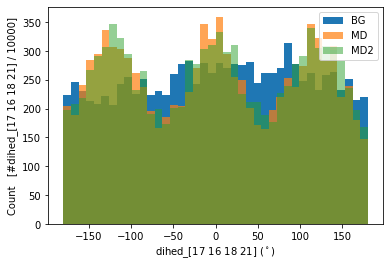

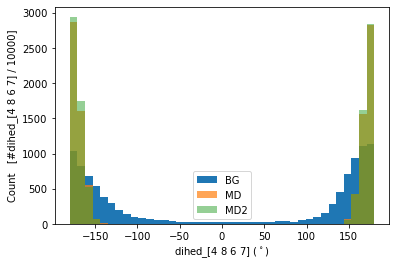

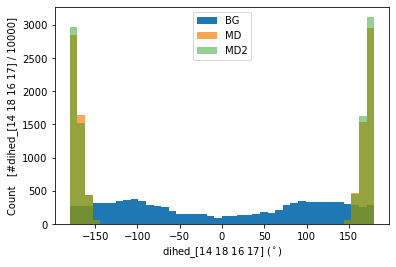

In [62]:
#print(BGdiheds.columns)
for col in BGdiheds:
    plot_dof_comparison(BGdiheds[col],MDdiheds[col],MD2diheds[col], dofname=f'dihed_{col}')
#plot_dof_comparison(BGdiheds['[5 4 6 8]'],MDdiheds['[5 4 6 8]'], dofname='dihed_[5 4 6 8]')

In [ ]:
anglemasks = pd.read_csv('ala_angles.txt',delim_whitespace=True,usecols=[3,4,5,6,7,8])

anglemasks['full'] = anglemasks[['Atom1','Atom2','Atom3']].agg(" ".join, axis=1)
anglemasks['indices'] = anglemasks[['A1','A2','A3']].astype(str).agg(" ".join, axis=1)
#(" ".join, axis=1)
print(anglemasks['indices'])

In [ ]:
def calc_angles(trajectory,type):
    angles = {}
    for maskset in anglemasks['full']:
        #print(maskset)
        angles[maskset] = pt.calc_angle(trajectory, str(maskset))

    df = pd.DataFrame(angles,)
    df.to_csv(f'{type}angles.csv')
    return df


In [ ]:
print(anglemasks['full'][1])
pt.calc_angle(trajectory_bg, anglemasks['full'][1])

anglesBG = calc_angles(trajectory_bg, 'BG')
anglesMD = calc_angles(trajectory_md, type='MD')

In [ ]:
for col in anglesBG:
    plot_dof_comparison(anglesBG[col],anglesMD[col], dofname=f'angle_{col}')